# Week 5 Quiz

## Yue Wang - yw3930

### Instructions

Replace the Name and UNI in cell above and the notebook name

Replace all '____' below using the instructions provided.

When completed, 
 - make sure you've replaced Name and UNI in the first cell and filename (eg: week_05_quiz-hw2592)
 - Click the github link shared on canvas for quiz5 to generate your own repository of quiz5
 - Click your own repository of quiz5 to commit your answers to github

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Sklearn provides a set of commonly used example datasets. 
# They can be accessed through the datasets submodule.
from sklearn import datasets

# We're going to use the Linnerud dataset to practice Regression in sklearn.

# The Linnerud dataset is a tiny multi-output regression dataset. It consists 
# of three excercise (data) and three physiological (target) variables 
# collected from twenty middle-aged men in a fitness club.
linnerud = datasets.load_linnerud()

# The features of the dataset contain data on 3 exercises
# Chins - number of chinups
# Situps - number of situps
# Jumps - number of jumping jacks

# Note that the features and target come as numpy matrices.
# We'll first load the features into a pandas dataframe.
df = pd.DataFrame(linnerud.data,columns=linnerud.feature_names)

# We'll also add the target to our dataframe.
# Note also that this dataset contains multiple targets.
# We'll only consider one of them: Weight
df['Weight'] = linnerud.target[:,linnerud.target_names.index('Weight')]

# For more information on the dataset, uncomment the print command below
#print(linnerud.DESCR)

# print the first 3 rows
df.head(3)

,Chins,Situps,Jumps,Weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0


<AxesSubplot:xlabel='Situps', ylabel='Weight'>

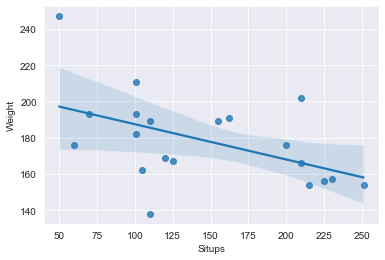

In [4]:
# What is the relationship between Situps and Weight?

# Plot a scatterplot and best-fit line for x=Situps vs y=Weight
#    using seaborn sns.regplot()
sns.regplot(data = df, x='Situps',y='Weight')

In [33]:
# The above plot should indicate a negative relationship 
#    between Situps and Weight
# How much does Weight go down if Situps goes up?
# To answer this we'll train a simple linear model.

# First import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create a variable X containing the independent variable 'Situps'
# Note that sklearn expects X to be two dimensional
#   so you must use one of the methods discussed in class
#   to return a two dimensional object
X = df[['Situps']]
# Create a variable y containing the dependent variable 'Weight'
# Note that y should only be one dimensional, 
#    so a Series (single column of a dataframe) works fine here
y = df['Weight']

# Instantiate a LinearRegression object with default parameter settings
#   and store as lr
lr = LinearRegression()

# Fit lr using the X and y defined above
model = lr.fit(X,y)

# Using the learned parameters in coef_ and intercept_, 
#   by how much do we expect Weight to go down when Situps goes up by 1?
# Print with a precision of 2
print('If the Situps goes up by 1, the Weight will change by:', np.round(model.coef_,2)) 

# Using the learned parameters in coef_ and intercept_, 
#   what should we expect weight to be when when Situps is 0?
# Print with a precision of 2
print('The expect weight when Situps is 0:', np.round(model.intercept_,2))

If the Situps goes up by 1, the Weight will change by: [-0.19]
The expect weight when Situps is 0: 206.92


In [44]:
# How is Weight related to all 3 features?

# Create a list containing the 3 feature names we're interested in 
#    as strings: Chins, Situps, Jumps
# Store as feature_names
# We'll do this to make sure we don't include 'Weight' in the 
#    regression as an independent variable
X = df[['Situps','Chins','Jumps']]

# Instantiate a second LinearRegression model with default parameters
#    and store as mlr
mlr = LinearRegression()

# Fit this model using all of the columns in feature_names
# Note that here we can pass the 2D dataframe without needing to .reshape(), etc.
model_1 = mlr.fit(X,y)

# For each feature name in feature_names, print out the name and 
#    corresponding learned coefficient
# It looks like one of the features actually has a positive relationship. 
# Print coefficient values with a precision of 2.
print(list(zip(model_1.coef_, X.columns)))
print('The relationship between Jumps and Weights is positive:',np.round(model_1.coef_[2],2))

[(-0.21771646975131498, 'Situps'), (-0.47502635866380194, 'Chins'), (0.09308837062185488, 'Jumps')]
The relationship between Jumps and Weights is positive: 0.09


In [48]:
# NOT REQUIRED

# For those that are interested exploring how statsmodels works

# Import the statsmodels api as sm
import statsmodels.api as sm

# Store the 3 features from df as X
X = df[['Situps','Chins','Jumps']]

# Add a constant to X (in order to learn the bias term) using sm.add_constant()
X = sm.add_constant(X)

# Instantiate and fit an OLS model using X and df.Weight as y 
#   and store as sm_model
# Note that in OLS, the target y is the first parameter!
sm_model = sm.OLS(y,X)


# Display the model summary
# Note that the coefficients in the summary match the values
#    found above using sklearn
results = sm_model.fit()
results.params

const     208.233519
Situps     -0.217716
Chins      -0.475026
Jumps       0.093088
dtype: float64